# Assignment 4 - EE18BTECH11050 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Ques 1. 

chi2 likelihood
- linear model:     0.04538379558592021
- quadratic model:  0.036608447550142836
- cubic model:  0.042152806010143505
[-1.11028083  2.79789863]
[-1.05578918  2.38475197  0.50261284]
maximum likelihood
linear model:    logLH = 22.018343408036262
quadratic model: logLH = 22.92491031200269
cubic model: logLH = 23.130409258797616
best model suited will be linear model


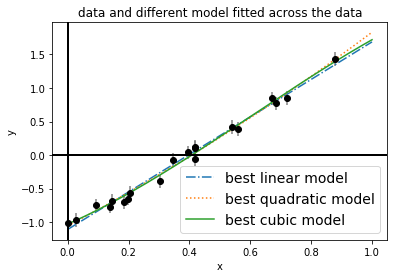

In [10]:
import matplotlib.mlab as mlab
import math
import pandas as pd
from scipy import optimize

data = pd.read_csv("testdata.csv")
x = data['x']
y = data['y']
sigma_y = data['sigma_y']

def polynomial_fit(theta, x):
    #Polynomial model of degree (len(theta) - 1)
    return sum(t * x ** n for (n, t) in enumerate(theta))

def logLH(theta, model=polynomial_fit, data=np.array([x,y,sigma_y])):
    #Gaussian log-likelihood of the model at theta
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

def best_theta(degree, model=polynomial_fit, data=np.array([x,y,sigma_y])):
    theta_0 = (degree + 1) * [0]
    neg_logLH = lambda theta: -logLH(theta, model, data)
    return optimize.fmin_bfgs(neg_logLH, theta_0, disp=False)

def compute_chi2(degree, data=np.array([x,y,sigma_y])):
    x, y, sigma_y = data
    theta = best_theta(degree, data=np.array([x,y,sigma_y]))
    resid = (y - polynomial_fit(theta, x)) / sigma_y
    return np.sum(resid ** 2)

def compute_dof(degree, data=np.array([x,y,sigma_y])):
    return data.shape[1] - (degree + 1)

def chi2_likelihood(degree, data=np.array([x,y,sigma_y])):
    chi2 = compute_chi2(degree, data)
    dof = compute_dof(degree, data)
    return stats.chi2(dof).pdf(chi2)

print("chi2 likelihood")
print("- linear model:    ", chi2_likelihood(1))
print("- quadratic model: ", chi2_likelihood(2))
print("- cubic model: ", chi2_likelihood(3))

theta1 = best_theta(1)
theta2 = best_theta(2)
theta3 = best_theta(3)
print(theta1)
print(theta2)

print("maximum likelihood")
print("linear model:    logLH =", logLH(best_theta(1)))
print("quadratic model: logLH =", logLH(best_theta(2)))
print("cubic model: logLH =", logLH(best_theta(3)))

print("best model suited will be linear model")
xfit = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model',linestyle='-.')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model',linestyle=':')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data and different model fitted across the data');
plt.show()

### Ques 2.

In [12]:
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x, y, sigma_y = data

(m, b), _ = optimize.curve_fit(linear, xdata=x, ydata=y, sigma=sigma_y)
y_lin = [m*i+b for i in x]

(a, b, c), _ = optimize.curve_fit(quad, xdata=x, ydata=y, sigma=sigma_y)
y_quad= [a*i**2+b*i+c for i in x]

(a, b, c, d), _ = optimize.curve_fit(cubic, xdata=x, ydata=y, sigma=sigma_y)
y_cubic = [a*i*3+b*i*2+c*i+d for i in x]

hi2_lin = np.sum(((y - y_lin)/sigma_y)**2)
BIC_lin = -2*np.log(chi2_lin) + 2*np.log(n)
AIC_lin = -2*np.log(chi2_lin) + 2*2
print("AIC for linear fit =", AIC_lin)
print("BIC for linear fit =", BIC_lin)

chi2_quad = np.sum(((y - y_quad)/sigma_y)**2)
BIC_quad = -2*np.log(chi2_quad) + 3*np.log(n)
AIC_quad = -2*np.log(chi2_quad) + 2*3
print("AIC for quadratic fit =", AIC_quad)
print("BIC for quadratic fit =", BIC_quad)

NameError: name 'linear' is not defined

### Ques 3.

" On the Kolmogorov-Smirnov Test for Normality with Mean and Variance Unknown" 

The standard tables used for K.S. test, consist of set of observations from a completely specified continuous distribution,
mainly this test is used to tell whether a set of observations are from a normal distribution, when mean and variance are not given, but must be estimated from given sample.

Another usage of this non-parametric statistic is that, it can be used to compare two empirical distributions, which defines "largest absolute difference between 2 cumulative distribution functions, as a measure of disagreement

in the paper by N.D. Gagunashvili, about comparison of weighted and unweighted histograms, where it is being discussed that, that how X^2 test are used for histograms for different events, the K.S. test for histograms about different statistics of event.

REFERENCES:

1) Massey, F. J. 1951. “The Kolmogorov-Smirnov Test for Goodness of Fit,”. Journal of the American Statistical Association, 46: 68–78. [Taylor & Francis Online], [Web of Science ®]
, , [Google Scholar]

2) Gagunashvili N 2006 Comparison of weighted and unweighted histograms arXiv: physics/0605123

### Ques 4.

In [13]:
p_val_higgs = [10**-1, 10**-2, 10**-3, 10**-5, 10**-7, 10**-9]
sign_higgs = stats.norm.isf(p_val_higgs)
p_val_ligo = 2*10**-7
sign_ligo = stats.norm.isf(p_val_ligo)
chi2 = 65.2
dof = 67
chi2_gof = 1-stats.chi2(dof).cdf(chi2)
print('significance in terms of number of sigmas for higgs boson: ', sign_higgs)
print('significance in terms of number of sigmas for LIGO discovery: ', sign_ligo)
print('chi square GOF is: ', chi2_gof)

significance in terms of number of sigmas for higgs boson:  [1.28155157 2.32634787 3.09023231 4.26489079 5.19933758 5.99780702]
significance in terms of number of sigmas for LIGO discovery:  5.068957749717791
chi square GOF is:  0.5394901931099038
